In [1]:
import pandas as pd

In [2]:
path = '/content/drive/MyDrive/Data Science Projects/Electricity Consumption - Data Analysis & Forecast/Course Data Set.csv'

In [3]:
df = pd.read_csv(path, index_col='DATE', parse_dates=True)
df.head()

,Value
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [4]:
print('The numbers of rows in the data frame is: {}'.format(df.shape[0]))

The numbers of rows in the data frame is: 397


In [5]:
df.describe()

,Value
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [6]:
import matplotlib
matplotlib.rc('figure', figsize=(15,10))

In [7]:
import matplotlib.pyplot as plt

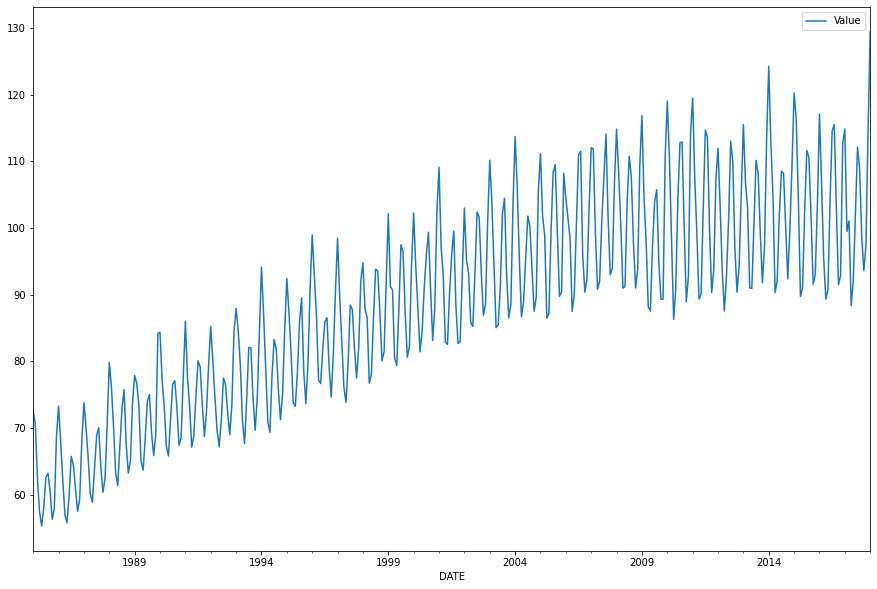

In [8]:
df.plot()
plt.show()

In [9]:
start_date = '1992-01-01'
end_date = '2010-12-31'

mask = (df.index >= start_date) & (df.index <= end_date)

df_mask = df.loc[mask]
df_mask

,Value
DATE,
1992-01-01,85.2855
1992-02-01,80.1643
1992-03-01,74.5275
1992-04-01,69.6441
1992-05-01,67.1784
...,...
2010-08-01,112.9014
2010-09-01,100.1209
2010-10-01,88.9251


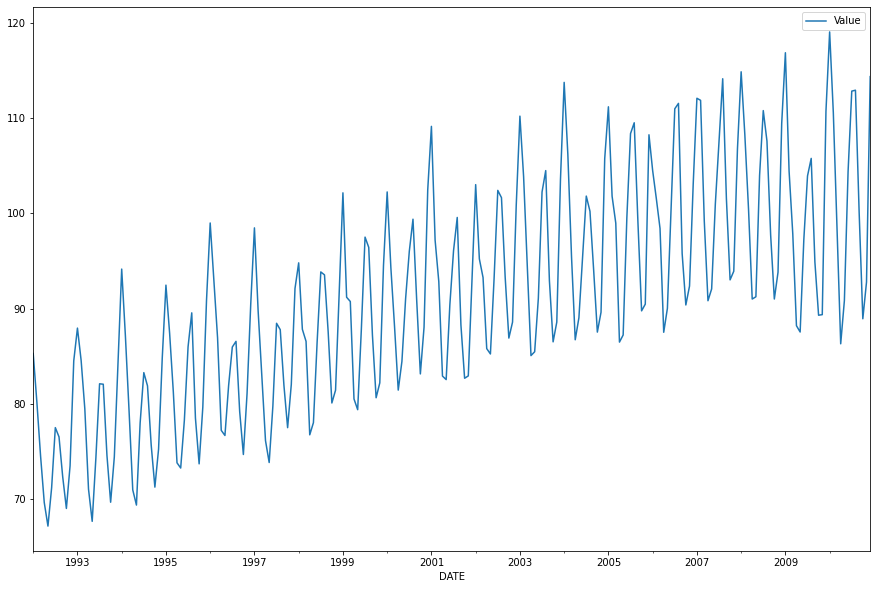

In [10]:
df_mask.plot()
plt.show()

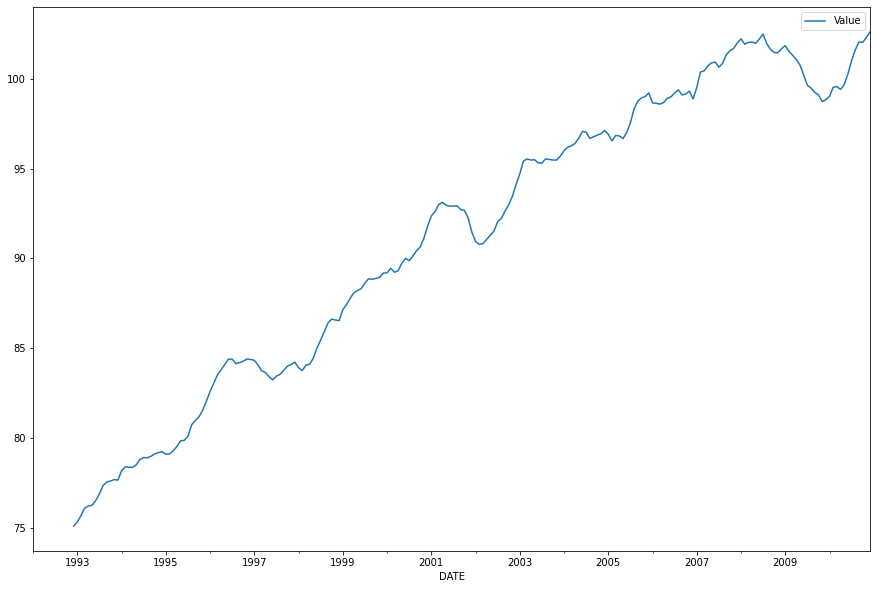

In [11]:
yearly_df_mask = df_mask.rolling(window=12).mean()
yearly_df_mask.plot()
plt.show()

In [12]:
df_mask.dtypes

Value    float64
dtype: object

In [13]:
df_mask.index = pd.to_datetime(df_mask.index)
df_mask

,Value
DATE,
1992-01-01,85.2855
1992-02-01,80.1643
1992-03-01,74.5275
1992-04-01,69.6441
1992-05-01,67.1784
...,...
2010-08-01,112.9014
2010-09-01,100.1209
2010-10-01,88.9251


In [14]:
xcoordinates = df_mask.resample('AS').first().index.strftime('%Y-%m-%d').values
print(xcoordinates)

['1992-01-01' '1993-01-01' '1994-01-01' '1995-01-01' '1996-01-01'
 '1997-01-01' '1998-01-01' '1999-01-01' '2000-01-01' '2001-01-01'
 '2002-01-01' '2003-01-01' '2004-01-01' '2005-01-01' '2006-01-01'
 '2007-01-01' '2008-01-01' '2009-01-01' '2010-01-01']


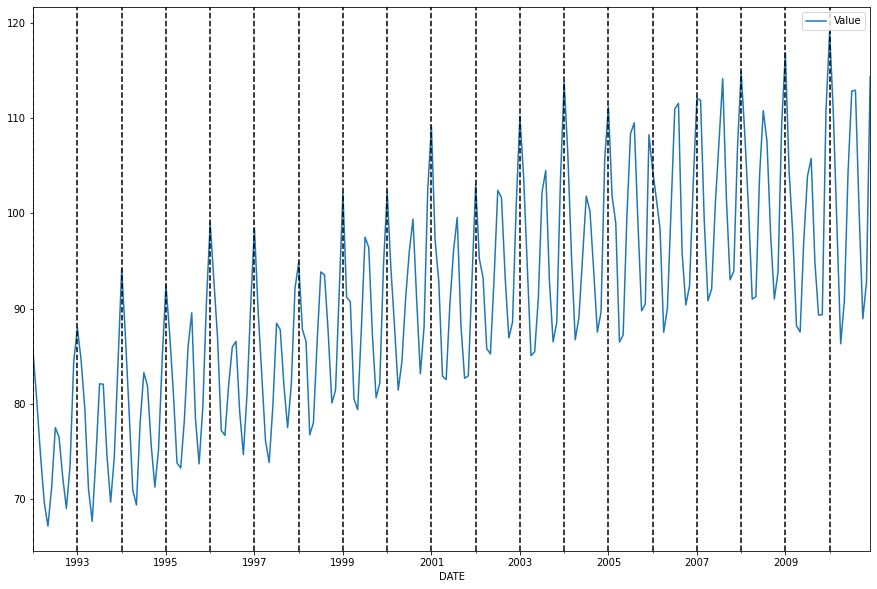

In [15]:
df_mask.plot()
for x_c in xcoordinates:
  plt.axvline(x=x_c, color='black', linestyle='--')

plt.show()

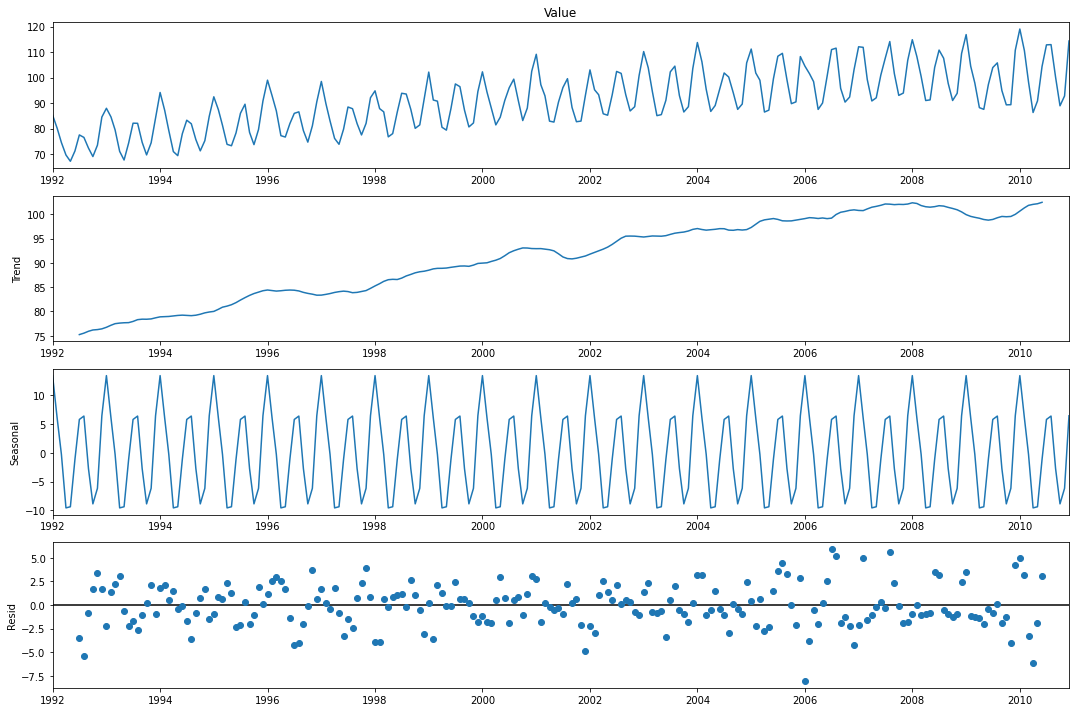

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose = seasonal_decompose(df_mask['Value'], model='additive')
decompose.plot()
plt.show()

In [25]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series):
  result = adfuller((series), autolag='AIC')
  labels = ['ADF Test Statistic', 'p_value', '# lags', '# observations']
  out = pd.Series(result[0:4], index=labels)
  print(out.to_string)
  if result[1]<=0.05:
    print('Reject the null hypothesis')
    print('Data has no unit root and stationary')
  else:
    print('Fail to reject null hypothesis')
    print('Data has unit root and non-stationary')


In [26]:
adf_test(df_mask['Value'])

<bound method Series.to_string of ADF Test Statistic     -1.18867
p_value                 0.67845
# lags                 15.00000
# observations        212.00000
dtype: float64>
Fail to reject null hypothesis
Data has unit root and non-stationary


In [ ]:
from statsmodels.tsa.ar_model import AutoReg
aic_score = []
for index in range(1,30):
  model = AutoReg(df_mask['Value'], lags= index)
  model_fitted = model.fit()
  aic_score.append(model_fitted.aic)

In [28]:
aic_score.index(min(aic_score))

28

In [29]:
aic_score[28]

966.513979284547

In [ ]:
model = AutoReg(df_mask['Value'], lags=48)
model_fitted = model.fit()
print(model_fitted.summary())

In [31]:
forecast = model_fitted.predict(start = len(df_mask), end= len(df_mask)+48)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [34]:
forecast = forecast.rename('AutoRed model 48 lags Prediction')

In [36]:
df_xcoordinates = df.resample('AS').first().index.strftime('%Y-%m-%m').values
df_mask_xcoordinates = df_mask.resample('AS').first().index.strftime('%Y-%m-%d').values
forecast_xcoordinates = forecast.resample('AS').first().index.strftime('%Y-%m-%m').values

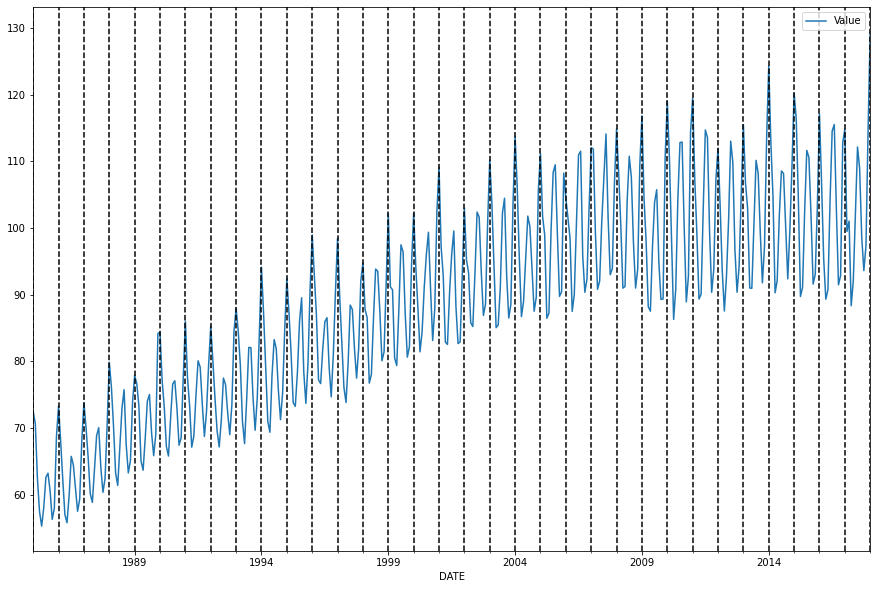

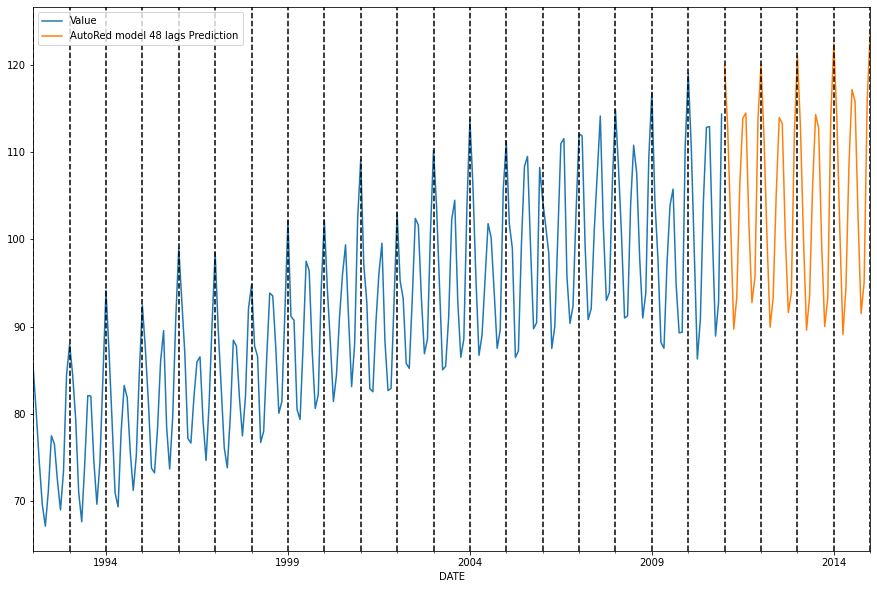

In [37]:
df.plot(legend=True)
for x_c in df_xcoordinates:
  plt.axvline(x=x_c, color='black', linestyle='--')
df_mask.plot(legend=True)
for x_c in df_mask_xcoordinates:
  plt.axvline(x=x_c, color='black', linestyle='--')
forecast.plot(legend=True)
for x_c in forecast_xcoordinates:
  plt.axvline(x=x_c, color='black', linestyle='--')
plt.show()

In [38]:
forecast.to_frame()

,AutoRed model 48 lags Prediction
2011-01-01,119.803384
2011-02-01,112.866237
2011-03-01,101.506138
2011-04-01,89.721141
2011-05-01,93.313719
2011-06-01,106.243867
2011-07-01,113.866141
2011-08-01,114.457500
2011-09-01,101.821004
2011-10-01,92.748460
